# Process Mining in Python: Basics and Integrations to Other Data Science Libraries
## ICPM'22 ML4PM
###### 2022-10-24; Sebastiaan J. van Zelst (with credits to Alessandro Berti)

## Process Mining
<figure>
<img src="img/pm_overview.png" alt="Process Mining Overview (Schematic)">
<figcaption align = "center"><small>https://quixy.com/wp-content/uploads/2020/08/Quixy_Blog_Process-Mining-plays-an-essential-role-in-Digital-Transformation-1024x427.png</small></figcaption>
</figure>

## Installing pm4py
```pip install pm4py```

## 'Hello World' 

In [1]:
import pm4py
log = pm4py.read_xes('data/receipt.xes', return_legacy_log_object=True)

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

In [2]:
import pandas as pd
df = pm4py.convert_to_dataframe(log)
df['time:timestamp']=pd.to_datetime(df['time:timestamp'], utc=True) # format the timestamp column
df.head()

,org:group,concept:instance,org:resource,concept:name,time:timestamp,lifecycle:transition,case:startdate,case:responsible,case:enddate_planned,case:department,case:group,case:concept:name,case:deadline,case:channel,case:enddate
0,Group 1,task-42933,Resource21,Confirmation of receipt,2011-10-11 11:45:40.276000+00:00,complete,2011-10-11 13:42:22.688000+02:00,Resource21,2011-12-06 13:41:31.788000+01:00,General,Group 2,case-10011,2011-12-06 13:41:31.788000+01:00,Internet,NaN
1,Group 4,task-42935,Resource10,T02 Check confirmation of receipt,2011-10-12 06:26:25.398000+00:00,complete,2011-10-11 13:42:22.688000+02:00,Resource21,2011-12-06 13:41:31.788000+01:00,General,Group 2,case-10011,2011-12-06 13:41:31.788000+01:00,Internet,NaN
2,Group 1,task-42957,Resource21,T03 Adjust confirmation of receipt,2011-11-24 14:36:51.302000+00:00,complete,2011-10-11 13:42:22.688000+02:00,Resource21,2011-12-06 13:41:31.788000+01:00,General,Group 2,case-10011,2011-12-06 13:41:31.788000+01:00,Internet,NaN
3,Group 4,task-47958,Resource21,T02 Check confirmation of receipt,2011-11-24 14:37:16.553000+00:00,complete,2011-10-11 13:42:22.688000+02:00,Resource21,2011-12-06 13:41:31.788000+01:00,General,Group 2,case-10011,2011-12-06 13:41:31.788000+01:00,Internet,NaN
4,EMPTY,task-43021,Resource30,Confirmation of receipt,2011-10-18 11:46:39.679000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00


In [3]:
c17 = df[df['case:concept:name'] =='case-10017'] 
c17

,org:group,concept:instance,org:resource,concept:name,time:timestamp,lifecycle:transition,case:startdate,case:responsible,case:enddate_planned,case:department,case:group,case:concept:name,case:deadline,case:channel,case:enddate
4,EMPTY,task-43021,Resource30,Confirmation of receipt,2011-10-18 11:46:39.679000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00
5,Group 1,task-43672,Resource30,T06 Determine necessity of stop advice,2011-10-18 11:47:06.950000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00
6,Group 4,task-43671,Resource30,T02 Check confirmation of receipt,2011-10-18 11:47:26.235000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00
7,Group 1,task-43674,Resource30,T03 Adjust confirmation of receipt,2011-10-18 11:47:41.811000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00
8,Group 4,task-43675,Resource30,T02 Check confirmation of receipt,2011-10-18 11:47:57.979000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00
9,Group 1,task-43673,Resource30,T10 Determine necessity to stop indication,2011-10-18 11:48:15.357000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00
10,Group 1,task-43676,Resource30,T03 Adjust confirmation of receipt,2011-10-18 11:48:30.632000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00
11,Group 4,task-43679,Resource30,T02 Check confirmation of receipt,2011-10-18 11:51:01.525000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00
12,Group 1,task-43686,admin2,T03 Adjust confirmation of receipt,2011-10-18 11:56:57.603000+00:00,complete,2011-10-11 01:06:40.020000+02:00,Resource04,2011-12-06 01:06:40.010000+01:00,General,Group 5,case-10017,2011-12-06 01:06:40+01:00,Internet,2011-10-18 13:56:55.943000+02:00


### Exploiting Pandas

#### Number of Cases

In [4]:
df['case:concept:name'].nunique()

1434

#### Activity Ocurrences

In [5]:
df["concept:name"].value_counts()

Confirmation of receipt                                  1434
T06 Determine necessity of stop advice                   1416
T02 Check confirmation of receipt                        1368
T04 Determine confirmation of receipt                    1307
T05 Print and send confirmation of receipt               1300
T10 Determine necessity to stop indication               1283
T03 Adjust confirmation of receipt                         55
T07-1 Draft intern advice aspect 1                         45
T11 Create document X request unlicensed                   44
T12 Check document X request unlicensed                    41
T15 Print document X request unlicensed                    39
T14 Determine document X request unlicensed                39
T07-2 Draft intern advice aspect 2                         32
T07-5 Draft intern advice aspect 5                         27
T17 Check report Y to stop indication                      26
T20 Print report Y to stop indication                      20
T19 Dete

#### Activities in Cases

In [6]:
df.groupby(["case:concept:name", "concept:name"]).first().reset_index()["concept:name"].value_counts()

Confirmation of receipt                                  1434
T02 Check confirmation of receipt                        1316
T06 Determine necessity of stop advice                   1309
T04 Determine confirmation of receipt                    1303
T05 Print and send confirmation of receipt               1300
T10 Determine necessity to stop indication               1283
T11 Create document X request unlicensed                   44
T12 Check document X request unlicensed                    40
T15 Print document X request unlicensed                    39
T14 Determine document X request unlicensed                39
T03 Adjust confirmation of receipt                         37
T07-1 Draft intern advice aspect 1                         29
T20 Print report Y to stop indication                      20
T19 Determine report Y to stop indication                  20
T17 Check report Y to stop indication                      20
T16 Report reasons to hold request                         20
T07-5 Dr

#### Start Activities

In [7]:
df.groupby("case:concept:name").first()["concept:name"].value_counts()

Confirmation of receipt    1434
Name: concept:name, dtype: int64

#### End Activities

In [8]:
df.groupby("case:concept:name").last()["concept:name"].value_counts()

T10 Determine necessity to stop indication    828
T05 Print and send confirmation of receipt    400
Confirmation of receipt                       116
T15 Print document X request unlicensed        39
T06 Determine necessity of stop advice         16
T20 Print report Y to stop indication          15
T02 Check confirmation of receipt               8
T11 Create document X request unlicensed        4
T03 Adjust confirmation of receipt              2
T04 Determine confirmation of receipt           2
T07-1 Draft intern advice aspect 1              1
T13 Adjust document X request unlicensed        1
T07-5 Draft intern advice aspect 5              1
T07-2 Draft intern advice aspect 2              1
Name: concept:name, dtype: int64

## Data Exploration 

### Distribution Plotting

#### Events per Day

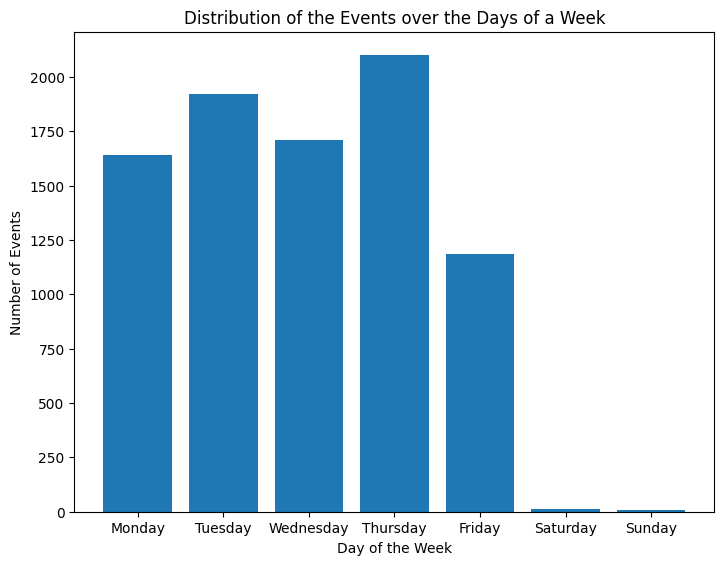

In [9]:
pm4py.view_events_distribution_graph(df, distr_type="days_week") # Matplotlib inside!

#### Events per Hour

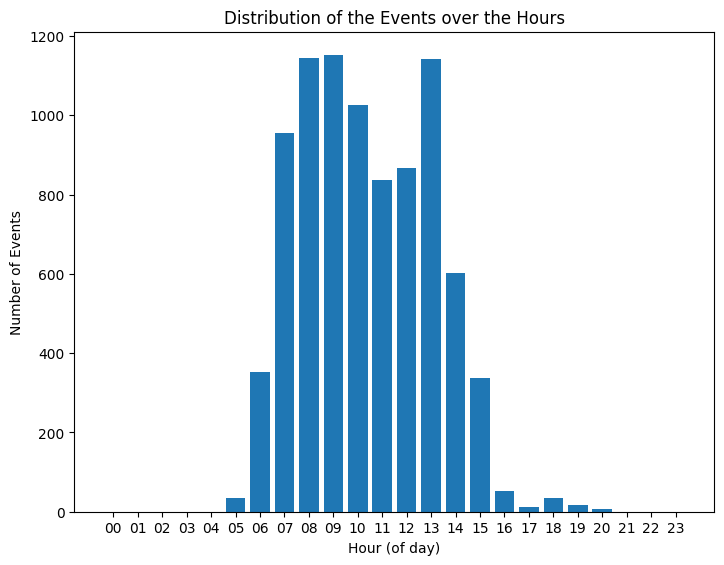

In [10]:
pm4py.view_events_distribution_graph(df, distr_type="hours") # Matplotlib inside!

#### Event Distribution Plot

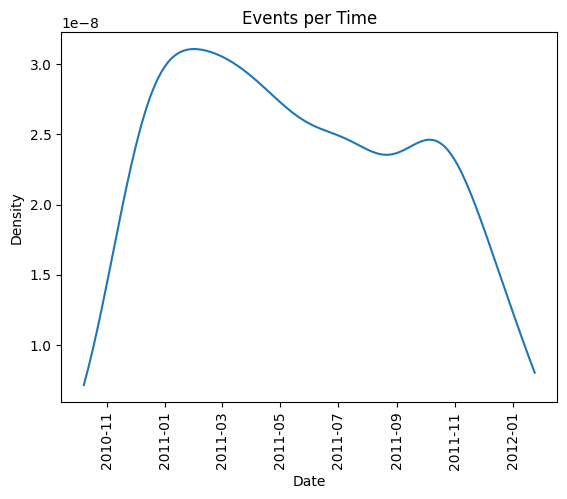

In [11]:
pm4py.view_events_per_time_graph(log) # Matplotlib inside!

#### Case Duration Distribution

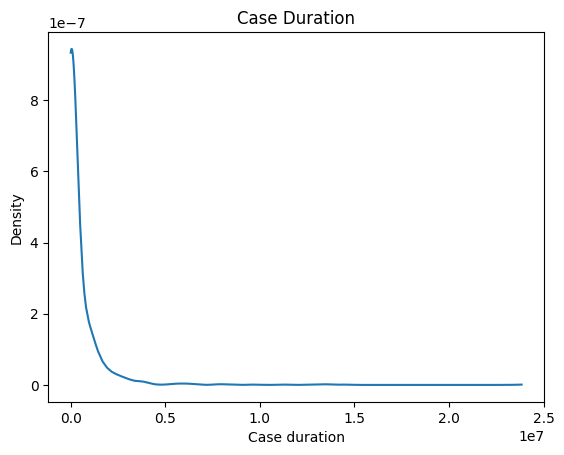

In [12]:
pm4py.view_case_duration_graph(log) # Matplotlib inside!

## Fun with Process Maps (and Graphy Theory)

### Discovering Process Maps

Let $L{\in}\mathcal{B}(\Sigma^*)$ be an event log (where $\Sigma$ represents all possible activities, and $\mathcal{B}(\Sigma^*)$ represents all *multisets* over sequences of activities)

Given $a,b{\in}\Sigma$, we write $a{>_{L}}b$, iff $\exists{\sigma{\in}L}\left(\exists{1{\leq}i{<}|\sigma|}\left(\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\right)\right)$

In [13]:
dfg = pm4py.discover_dfg(df)
print(dfg[0]) # graph structure

{('Confirmation of receipt', 'T02 Check confirmation of receipt'): 1079, ('Confirmation of receipt', 'T06 Determine necessity of stop advice'): 239, ('T02 Check confirmation of receipt', 'T03 Adjust confirmation of receipt'): 43, ('T02 Check confirmation of receipt', 'T04 Determine confirmation of receipt'): 1119, ('T02 Check confirmation of receipt', 'T05 Print and send confirmation of receipt'): 1, ('T02 Check confirmation of receipt', 'T06 Determine necessity of stop advice'): 178, ('T02 Check confirmation of receipt', 'T07-1 Draft intern advice aspect 1'): 2, ('T02 Check confirmation of receipt', 'T07-2 Draft intern advice aspect 2'): 1, ('T02 Check confirmation of receipt', 'T07-5 Draft intern advice aspect 5'): 1, ('T02 Check confirmation of receipt', 'T10 Determine necessity to stop indication'): 15, ('T03 Adjust confirmation of receipt', 'T02 Check confirmation of receipt'): 51, ('T03 Adjust confirmation of receipt', 'T06 Determine necessity of stop advice'): 2, ('T04 Determine

Observe that in `pm4py`, we use: $\sum\limits_{\sigma{\in}L}L(\sigma){\cdot}|\{i{\mid}1{\leq}i{<}|\sigma|{\wedge}\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\}|$

#### Start Activities

In [14]:
print(dfg[1]) # start activities

{'Confirmation of receipt': 1434}


For the 'math lovers': $s_L(a){=}\sum\limits_{\sigma{\in}L}L(\sigma){\cdot}\begin{cases}1&if\ \sigma(1){=}a\\0&otherwise\end{cases}$

#### End Activities

In [15]:
print(dfg[2]) # end activities

{'T10 Determine necessity to stop indication': 828, 'T05 Print and send confirmation of receipt': 400, 'Confirmation of receipt': 116, 'T15 Print document X request unlicensed': 39, 'T06 Determine necessity of stop advice': 16, 'T20 Print report Y to stop indication': 15, 'T02 Check confirmation of receipt': 8, 'T11 Create document X request unlicensed': 4, 'T03 Adjust confirmation of receipt': 2, 'T04 Determine confirmation of receipt': 2, 'T07-1 Draft intern advice aspect 1': 1, 'T13 Adjust document X request unlicensed': 1, 'T07-5 Draft intern advice aspect 5': 1, 'T07-2 Draft intern advice aspect 2': 1}


$e_L(a){=}\sum\limits_{\sigma{\in}L}L(\sigma){\cdot}\begin{cases}1&if\ \sigma(|\sigma|){=}a\\0&otherwise\end{cases}$

#### Visualizing the Process Map

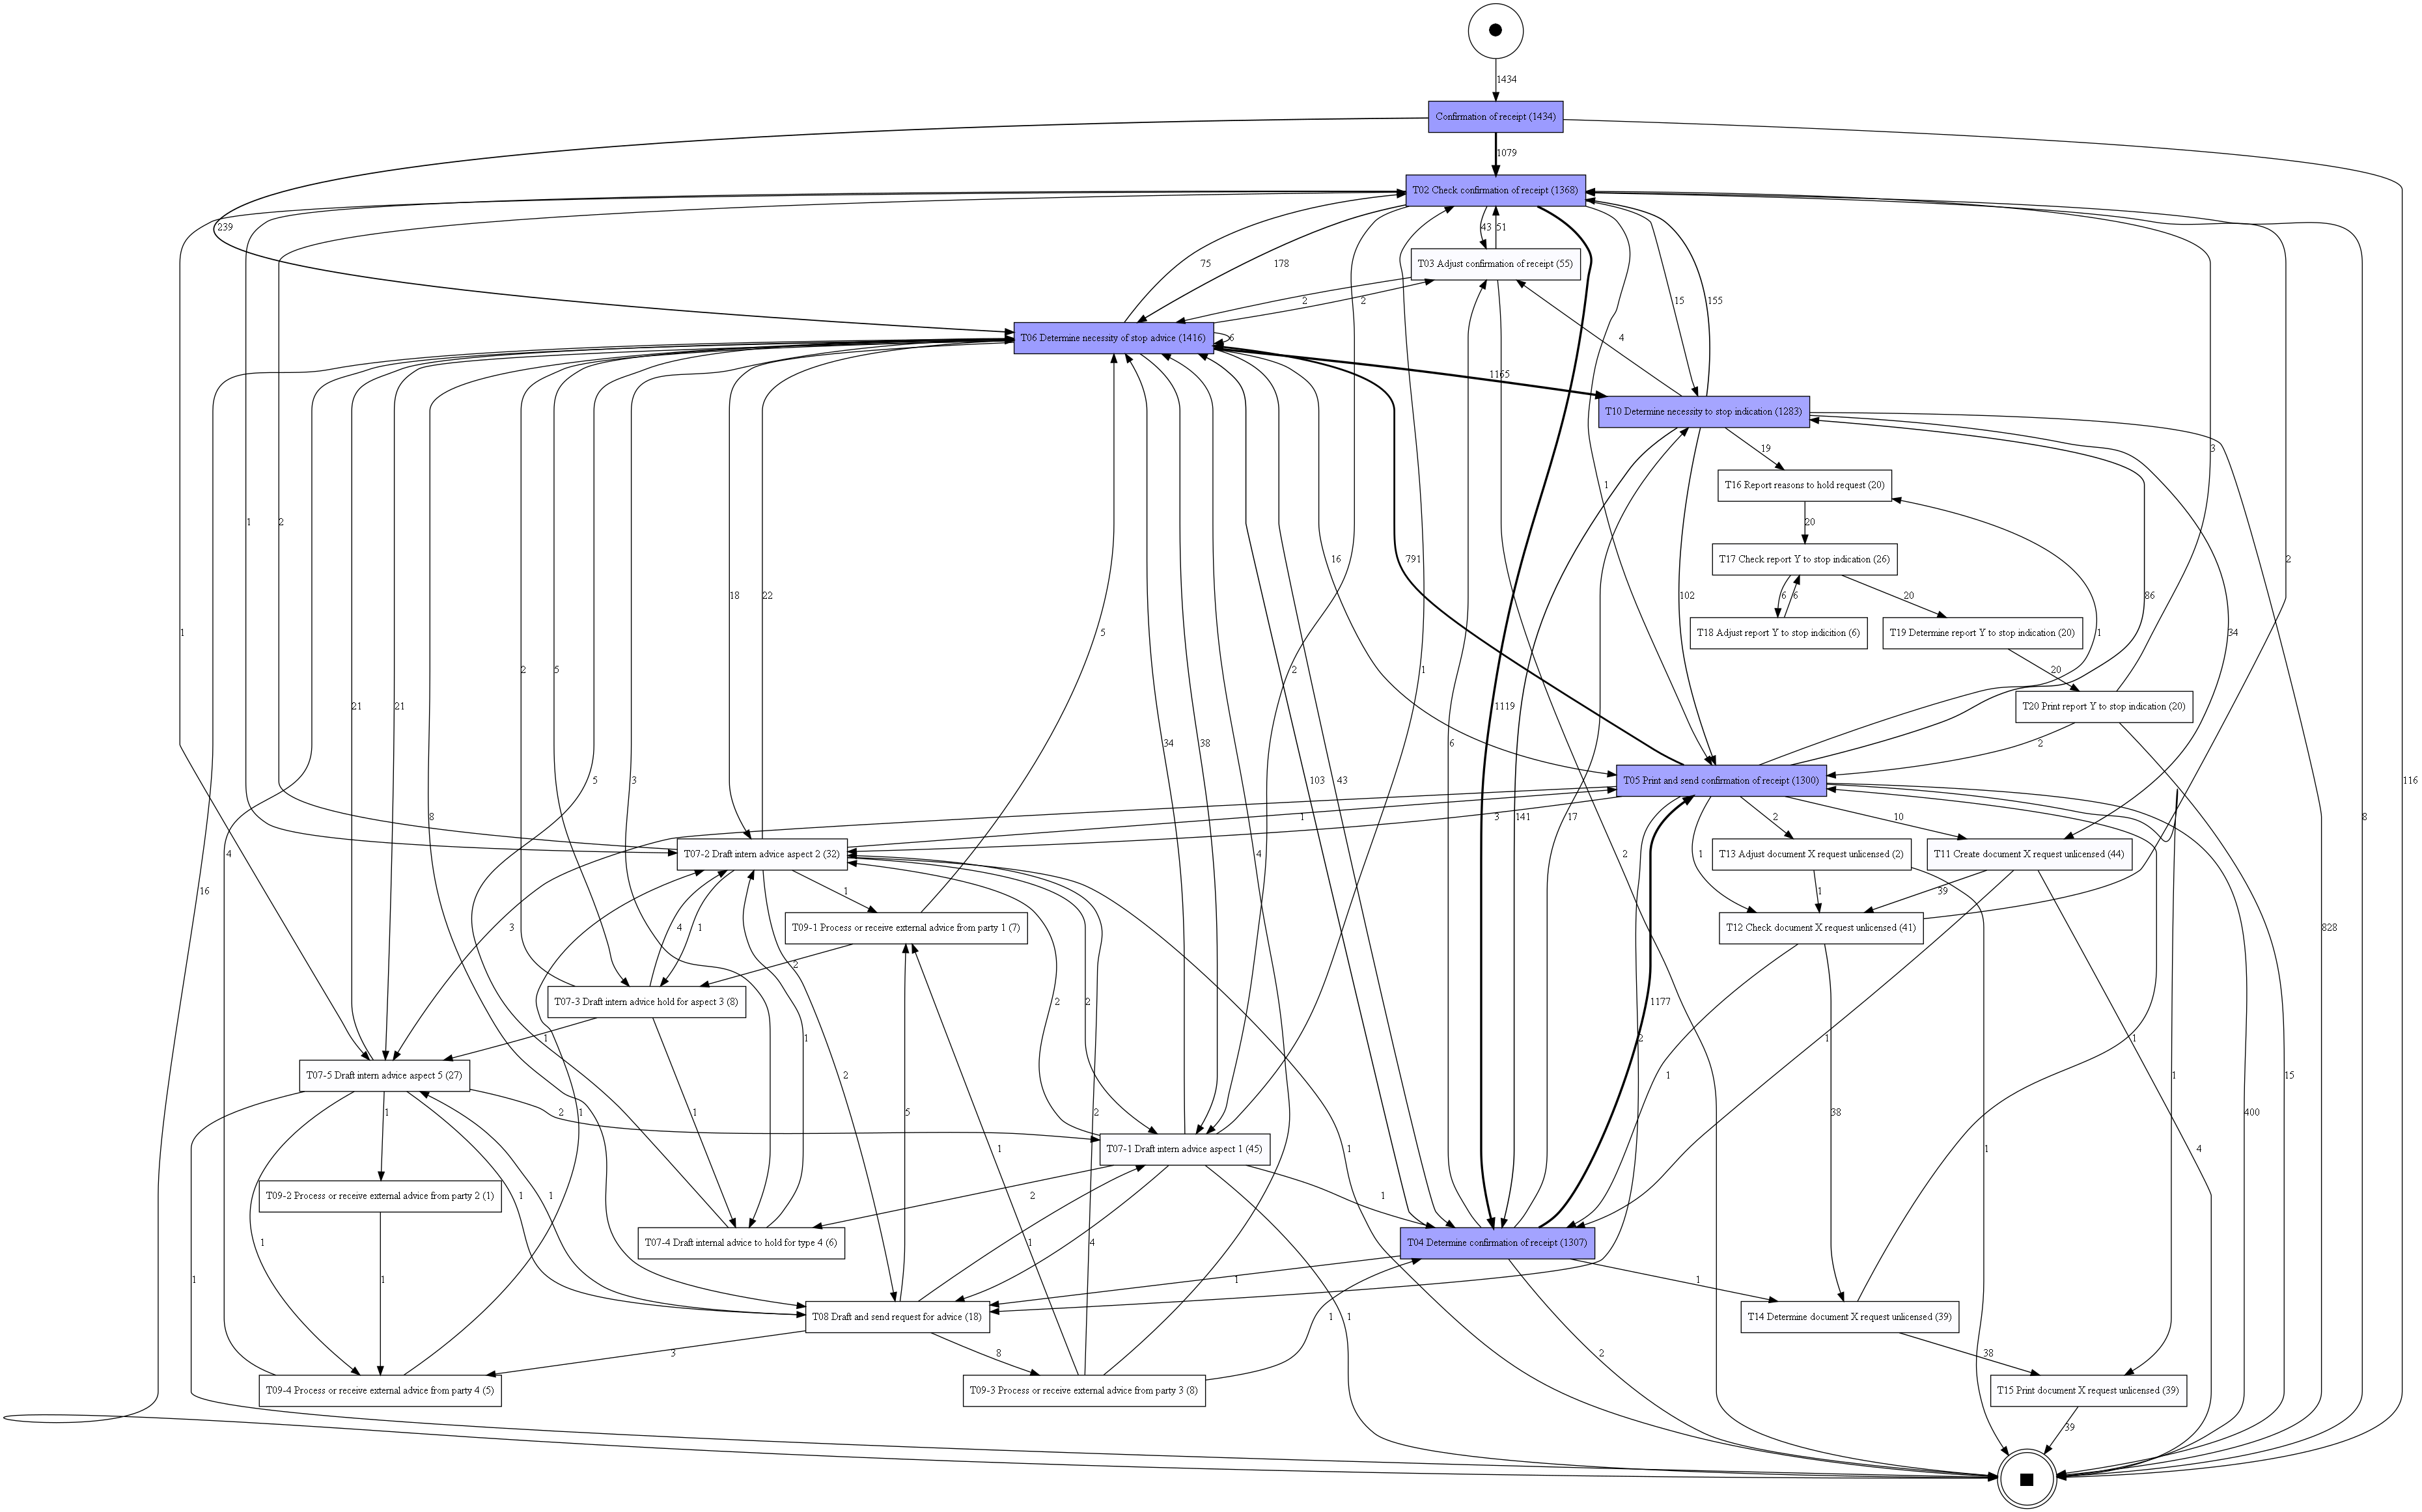

In [16]:
pm4py.view_dfg(dfg[0], dfg[1], dfg[2])

### Graph Theory for Process Maps (using NetworkX)

#### Converting the Process Map

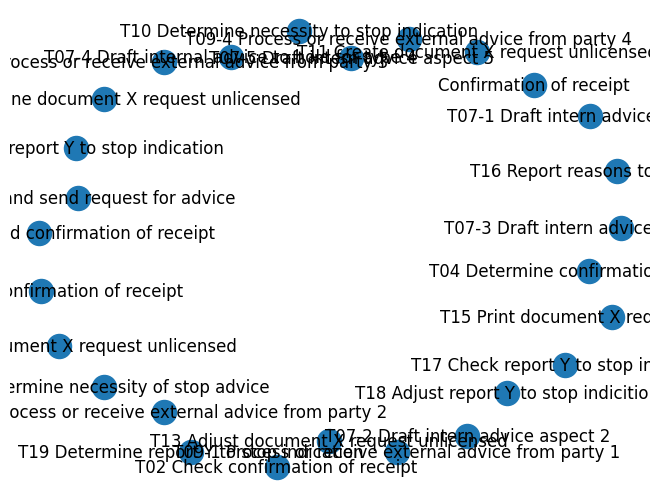

In [17]:
%matplotlib inline
import networkx as nx
import itertools as it
G = nx.DiGraph()
alphabet = set(list(it.chain.from_iterable([[a,b] for (a,b) in dfg[0]]))).union(dfg[1].keys()).union(dfg[2].keys())
G.add_nodes_from(alphabet) # adding nodes
nx.draw(G, with_labels = True)

#### Adding Arcs

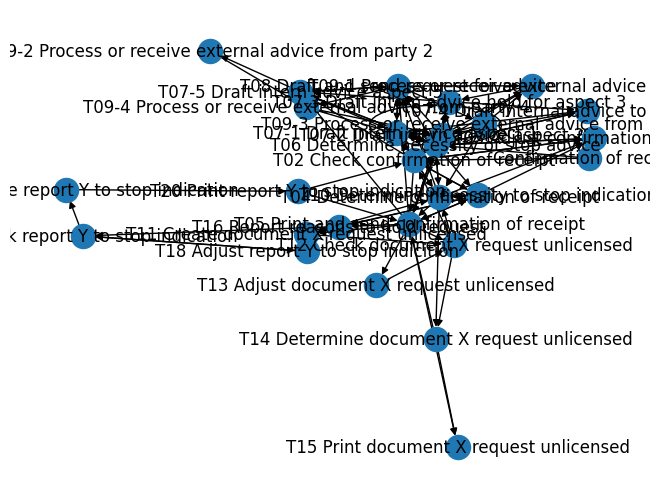

In [18]:
G.add_edges_from(dfg[0].keys())
nx.draw(G, with_labels = True)

### Degree of Vertices

The *indegree* of a vertex $v$, i.e., $deg^-(v)$, represents the number of *incoming arcs* of $v$ in $G$. ($deg^+(v)$ is defined symmetrically)

In [19]:
sorted([(n, i) for (n,i) in G.in_degree()], key=lambda t: t[1], reverse=True)

[('T06 Determine necessity of stop advice', 14),
 ('T07-2 Draft intern advice aspect 2', 8),
 ('T02 Check confirmation of receipt', 8),
 ('T04 Determine confirmation of receipt', 7),
 ('T05 Print and send confirmation of receipt', 7),
 ('T08 Draft and send request for advice', 6),
 ('T07-1 Draft intern advice aspect 1', 5),
 ('T07-5 Draft intern advice aspect 5', 5),
 ('T10 Determine necessity to stop indication', 4),
 ('T03 Adjust confirmation of receipt', 4),
 ('T09-4 Process or receive external advice from party 4', 3),
 ('T07-3 Draft intern advice hold for aspect 3', 3),
 ('T09-1 Process or receive external advice from party 1', 3),
 ('T12 Check document X request unlicensed', 3),
 ('T07-4 Draft internal advice to hold for type 4', 3),
 ('T11 Create document X request unlicensed', 2),
 ('T15 Print document X request unlicensed', 2),
 ('T16 Report reasons to hold request', 2),
 ('T17 Check report Y to stop indication', 2),
 ('T14 Determine document X request unlicensed', 2),
 ('T18 

### Dominator of a Graph

A vertex $d$ dominates a vertex $v$ in a graph $G$ iff every path from some given *entry node* $s$ visits $d$

In [20]:
nx.immediate_dominators(G, 'Confirmation of receipt')

{'Confirmation of receipt': 'Confirmation of receipt',
 'T02 Check confirmation of receipt': 'Confirmation of receipt',
 'T03 Adjust confirmation of receipt': 'Confirmation of receipt',
 'T06 Determine necessity of stop advice': 'Confirmation of receipt',
 'T04 Determine confirmation of receipt': 'Confirmation of receipt',
 'T05 Print and send confirmation of receipt': 'Confirmation of receipt',
 'T13 Adjust document X request unlicensed': 'T05 Print and send confirmation of receipt',
 'T10 Determine necessity to stop indication': 'Confirmation of receipt',
 'T16 Report reasons to hold request': 'Confirmation of receipt',
 'T17 Check report Y to stop indication': 'T16 Report reasons to hold request',
 'T19 Determine report Y to stop indication': 'T17 Check report Y to stop indication',
 'T20 Print report Y to stop indication': 'T19 Determine report Y to stop indication',
 'T18 Adjust report Y to stop indicition': 'T17 Check report Y to stop indication',
 'T11 Create document X request 

### Centrality of a Node

In [21]:
sorted(nx.degree_centrality(G).items(), key=lambda t: t[1], reverse=True) 

[('T06 Determine necessity of stop advice', 1.0),
 ('T05 Print and send confirmation of receipt', 0.6538461538461539),
 ('T02 Check confirmation of receipt', 0.6153846153846154),
 ('T07-2 Draft intern advice aspect 2', 0.576923076923077),
 ('T04 Determine confirmation of receipt', 0.5),
 ('T08 Draft and send request for advice', 0.42307692307692313),
 ('T07-1 Draft intern advice aspect 1', 0.42307692307692313),
 ('T07-5 Draft intern advice aspect 5', 0.38461538461538464),
 ('T10 Determine necessity to stop indication', 0.38461538461538464),
 ('T07-3 Draft intern advice hold for aspect 3', 0.2692307692307693),
 ('T12 Check document X request unlicensed', 0.23076923076923078),
 ('T03 Adjust confirmation of receipt', 0.23076923076923078),
 ('T09-4 Process or receive external advice from party 4',
  0.19230769230769232),
 ('T09-1 Process or receive external advice from party 1',
  0.19230769230769232),
 ('T09-3 Process or receive external advice from party 3',
  0.19230769230769232),
 ('T0

## Discovering Process Models

### Discovering a BPMN Model (Raw Data)

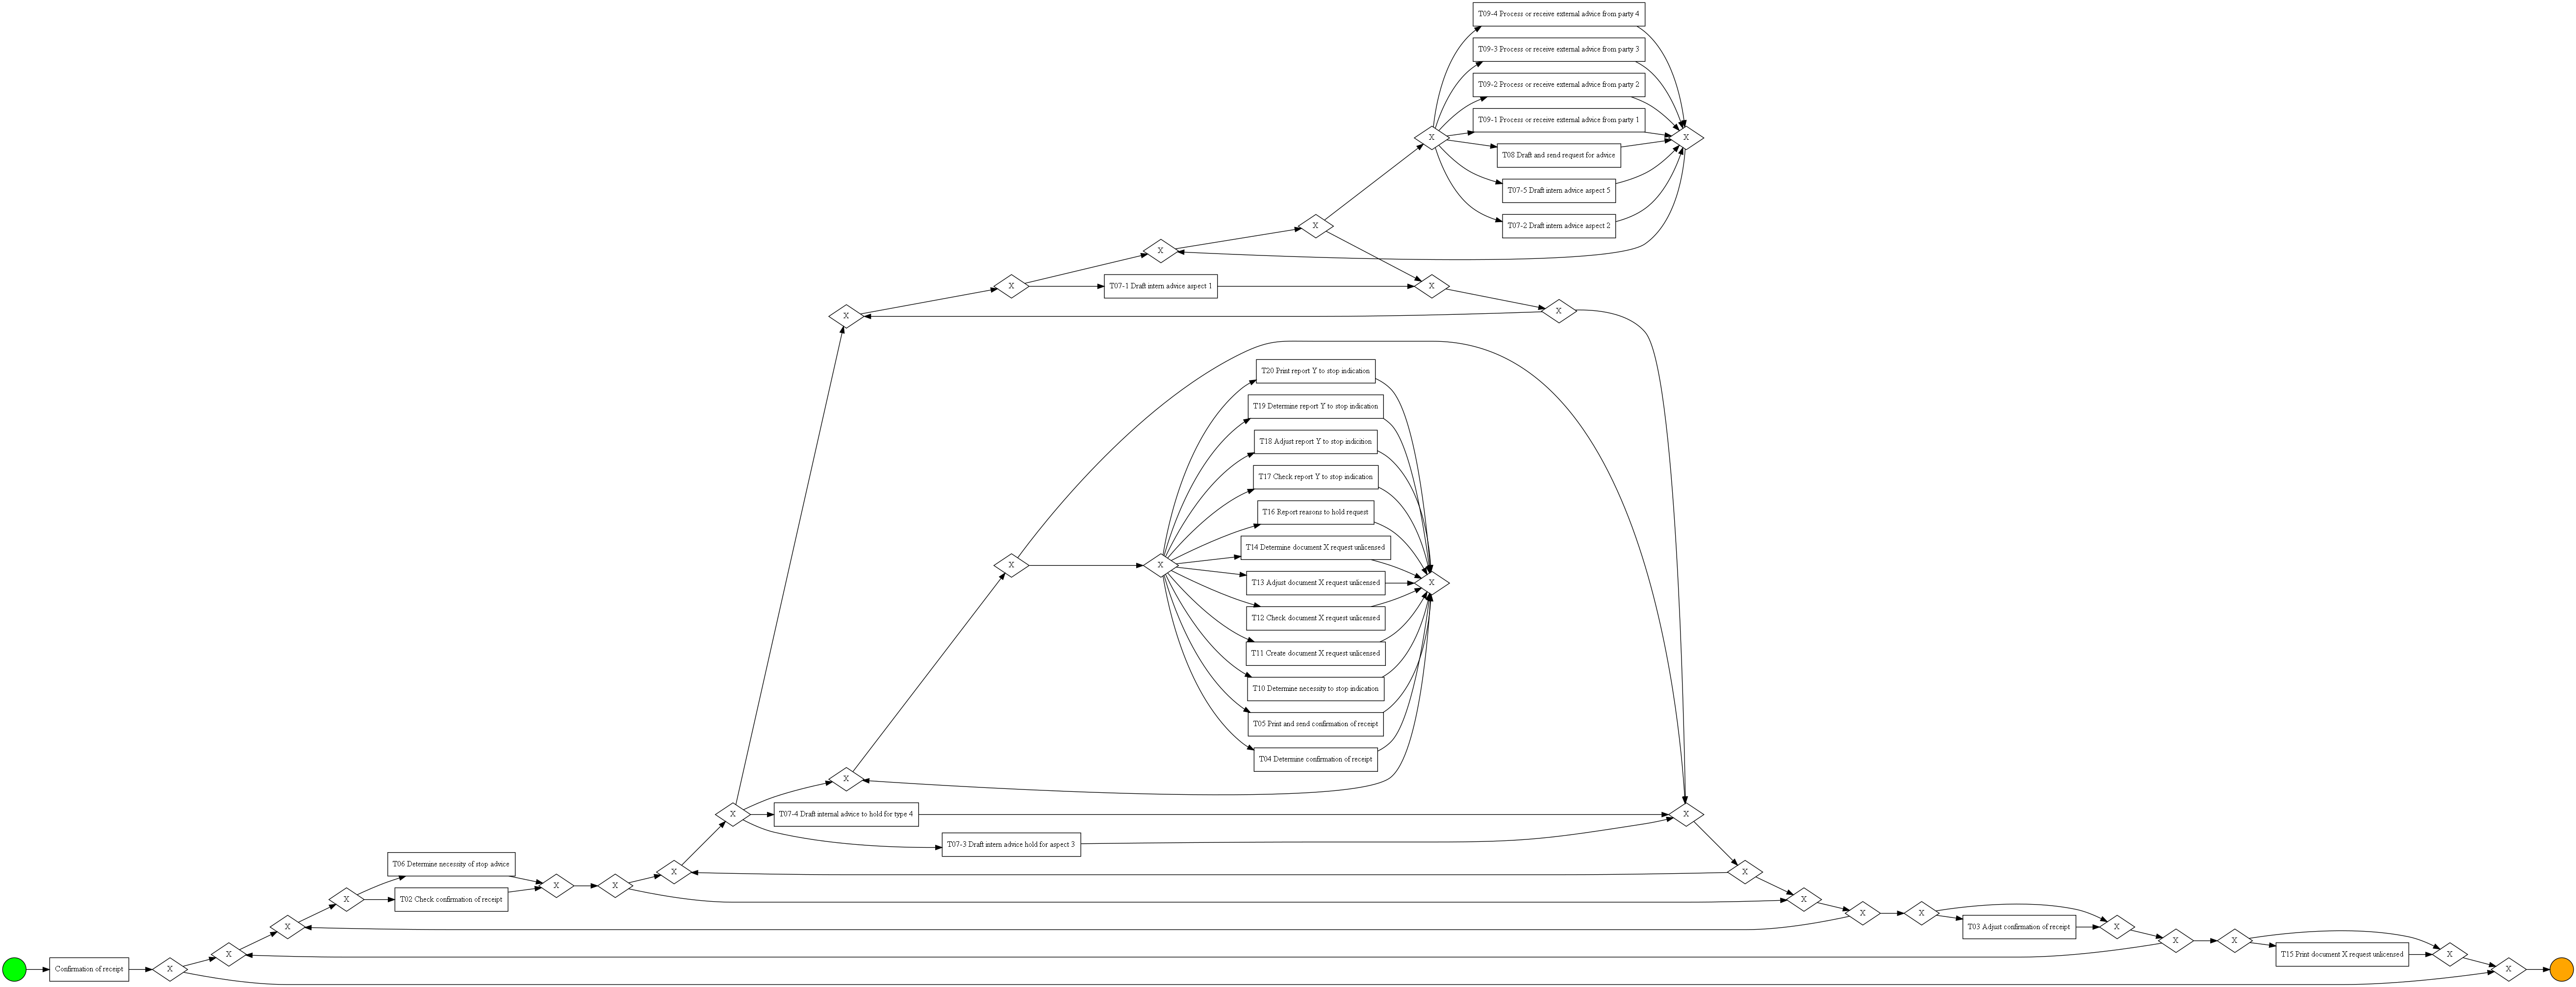

In [22]:
bpmn_1 = pm4py.discover_bpmn_inductive(df)
pm4py.view_bpmn(bpmn_1)

### Discovering a BPMN Model (Internal Filtering)

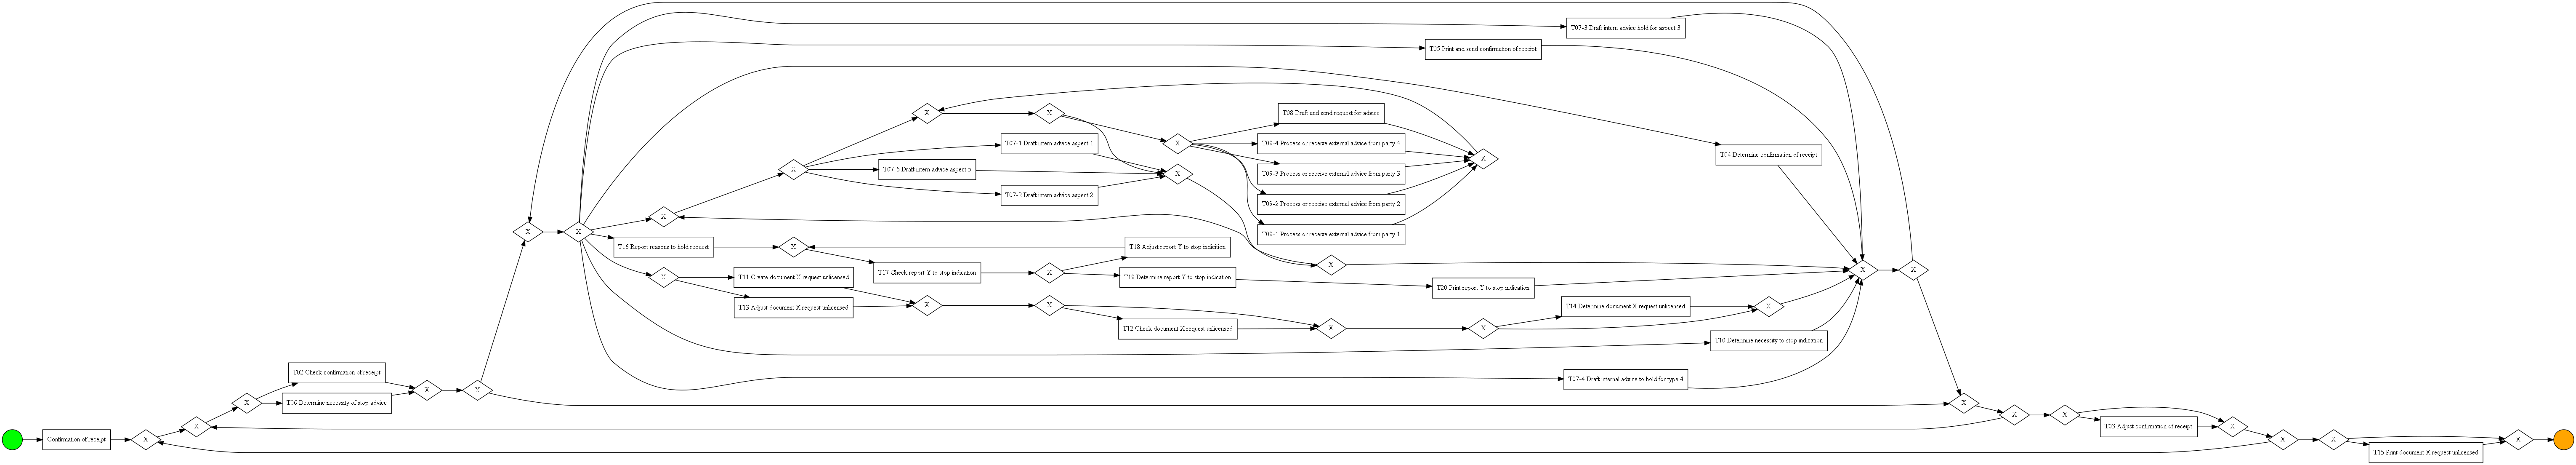

In [23]:
bpmn_2 = pm4py.discover_bpmn_inductive(df, noise_threshold=0.1)
pm4py.view_bpmn(bpmn_2)

## Checking Model Quality

### Converting the Model

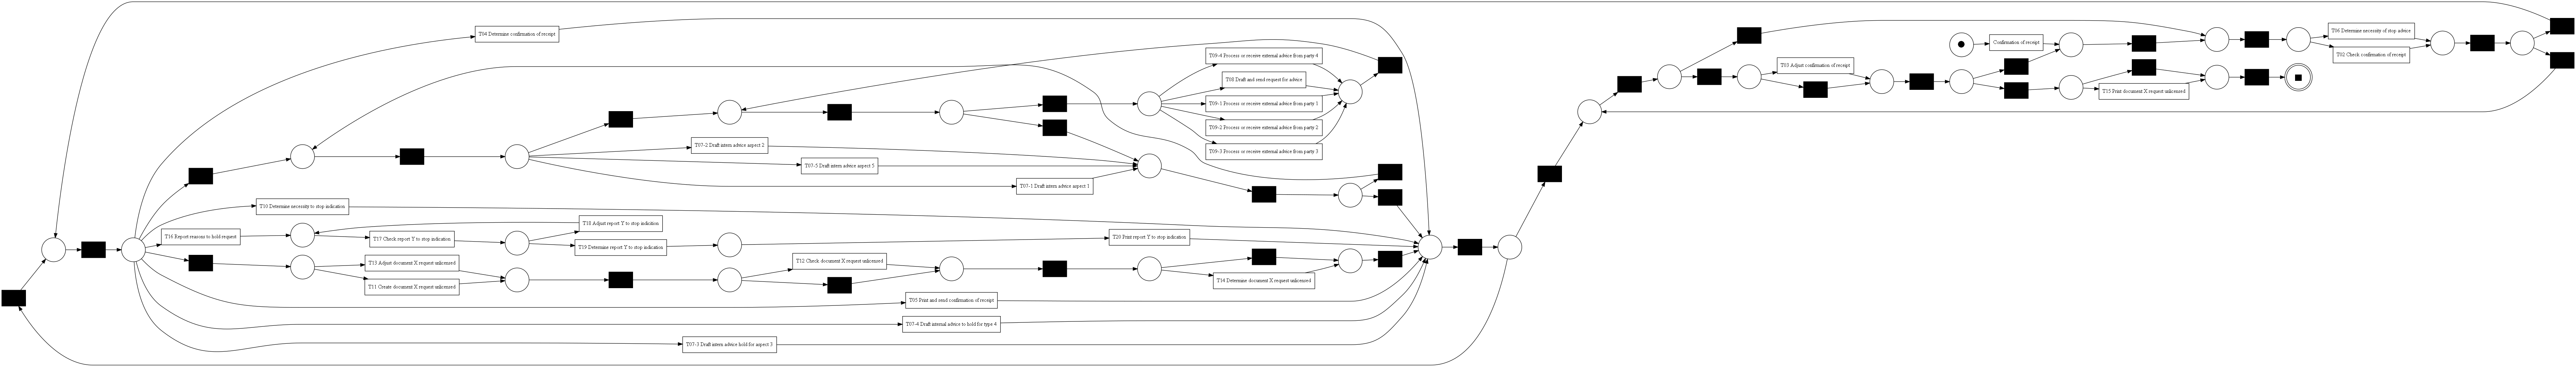

In [24]:
pn, im, fm = pm4py.convert_to_petri_net(bpmn_2)
pm4py.view_petri_net(pn, im, fm)

### Checking Behavioral Model Properties

In [25]:
pm4py.check_soundness(pn, im, fm)

Input is ok.
Petri Net is a workflow net.
Every place is covered by s-components.
There are no dead tasks.
All tasks are live.


True

Technically, the net should only be *easy sound*

Let $N{=}(P,T,F)$ be a Petri net and let $i,o{\in}\mathcal{B}(P)$ be a corresponding *initial* and *final* marking.

$(N,i)$ is *easy sound* iff $o{\in}\mathcal{R}(N,i)$ (aka, the *final marking* $o$ should be reachable from initial marking $i$)

### Computing Quality Statistics

#### Fitness

The *fitness* $f$ of an event log $L$ w.r.t. a model $M$ is the fraction of log behavior that is described by the model.

$f(L,M){=}1{\implies}$ all behavior described by the event log is also described by the model

$f(L,M){=}0{\implies}$ none of the behavior described by the event log is also described by the model

In [26]:
pm4py.fitness_token_based_replay(log, pn, im, fm) # fast results; less accurate/explainable

replaying log with TBR, completed variants ::   0%|          | 0/116 [00:00<?, ?it/s]

{'perc_fit_traces': 91.77126917712691,
 'average_trace_fitness': 0.9595219818436711,
 'log_fitness': 0.9973799902304721,
 'percentage_of_fitting_traces': 91.77126917712691}

In [27]:
pm4py.fitness_alignments(log, pn, im, fm)

aligning log, completed variants ::   0%|          | 0/116 [00:00<?, ?it/s]

{'percFitTraces': 91.77126917712691,
 'averageFitness': 0.9729195722919578,
 'percentage_of_fitting_traces': 91.77126917712691,
 'average_trace_fitness': 0.9729195722919578,
 'log_fitness': 0.9893740726376428}

#### Precision

The *precision* $p$ of a model $M$ w.r.t. a log $L$, is the fraction of model behavior that is also described by the log.

$p(M,L){=}1{\implies}$ all behavior described by the model is also described by the log

$p(M,L){=}0{\implies}$ none of the behavior described by the model is also described by the log

Often, when $p(M,L){\approx}0$, the model describes a lot of behavior (or $|\mathcal{L}(M)|{=}\infty$)

In [28]:
pm4py.precision_token_based_replay(log, pn, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/458 [00:00<?, ?it/s]

0.2067348714612779

In [29]:
pm4py.precision_alignments(log, pn, im, fm)

computing precision with alignments, completed variants ::   0%|          | 0/458 [00:00<?, ?it/s]

0.2067348714612779

#### Diagnostics

In [30]:
alignments = pm4py.conformance_diagnostics_alignments(log, pn, im, fm)
alignments[0]

aligning log, completed variants ::   0%|          | 0/116 [00:00<?, ?it/s]

{'alignment': [('Confirmation of receipt', 'Confirmation of receipt'),
  ('>>', None),
  ('>>', None),
  ('T02 Check confirmation of receipt', 'T02 Check confirmation of receipt'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('T03 Adjust confirmation of receipt', 'T03 Adjust confirmation of receipt'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('T02 Check confirmation of receipt', 'T02 Check confirmation of receipt'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None)],
 'cost': 19,
 'visited_states': 28,
 'queued_states': 61,
 'traversed_arcs': 63,
 'lp_solved': 4,
 'fitness': 1.0,
 'bwc': 60011}

In [31]:
non_fitting = list(filter(lambda a: a['fitness']<1.0, alignments))
non_fitting[0]

{'alignment': [('Confirmation of receipt', 'Confirmation of receipt'),
  ('>>', None),
  ('>>', None),
  ('>>', 'T06 Determine necessity of stop advice'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None)],
 'cost': 10011,
 'visited_states': 13,
 'queued_states': 19,
 'traversed_arcs': 21,
 'lp_solved': 3,
 'fitness': 0.6666666666666667,
 'bwc': 30011}

#### Reconstructing the Trace

In [32]:
alignment = non_fitting[0]['alignment']
trace = list(map(lambda m: m[0], filter(lambda m: m[0] !='>>', alignment)))
trace

['Confirmation of receipt']

#### Reconstructing the Model Behavior

In [33]:
trace = list(map(lambda m: m[1], filter(lambda m: m[1] !='>>' and m[1] is not None, alignment)))
trace

['Confirmation of receipt', 'T06 Determine necessity of stop advice']

### Comparing Footprints

Recall: $a{>_{L}}b$, iff $\exists{\sigma{\in}L}\left(\exists{1{\leq}i{<}|\sigma|}\left(\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\right)\right)$

We let $a{\to_L}b$ iff $a{>_L}b$ and $b{\not>_L}a$, we let $a{\#}b$ iff $a{\not>_L}b$ and $b{\not>_L}a$, and, we let $a{||_L}b$ iff $a{>_L}b$ and $b{>_L}a$

We can do the same thing for the model: assume $\mathcal{L}(M){\subseteq}\Sigma^*$ represents the language of some model $M$. 

We let $a{>_{M}}b$, iff $\exists{\sigma{\in}\mathcal{L}(M)}\left(\exists{1{\leq}i{<}|\sigma|}\left(\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\right)\right)$

Then, $a{\to_M}b$, $a{\#_L}b$, and $a{||_L}b$ are defined analogously 

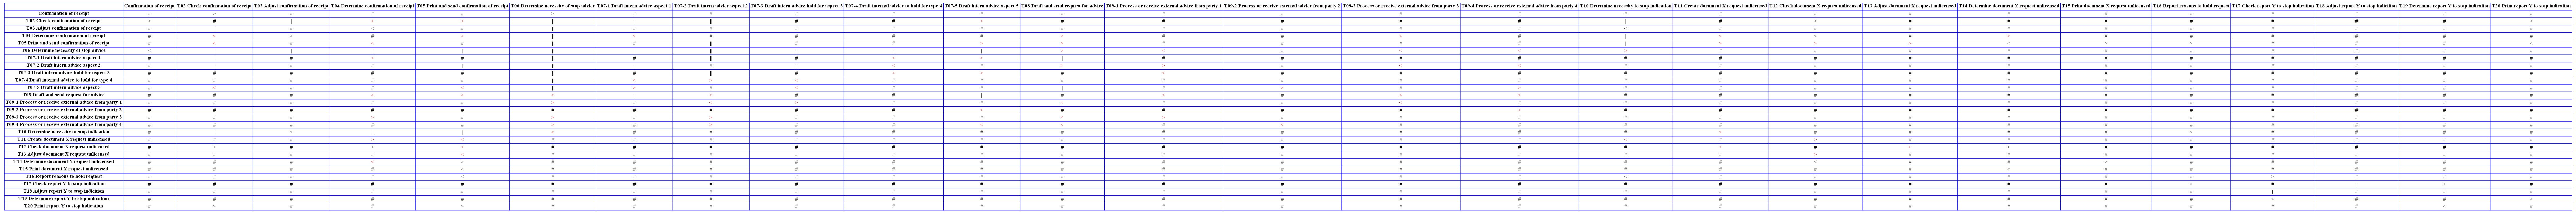

In [34]:
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
process_tree = pm4py.discover_process_tree_inductive(df, noise_threshold=0.1)
fp_log = footprints_discovery.apply(log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)
fp_model = footprints_discovery.apply(process_tree, variant=footprints_discovery.Variants.PROCESS_TREE)
from pm4py.visualization.footprints import visualizer as fp_visualizer
gviz = fp_visualizer.apply(fp_log, fp_model)
fp_visualizer.view(gviz)

## Classification and Prediction

### Machine Learning at the Case Level

#### Attribute Inspection

In [35]:
pm4py.get_event_attributes(df)

['org:group',
 'concept:instance',
 'org:resource',
 'concept:name',
 'time:timestamp',
 'lifecycle:transition',
 'case:startdate',
 'case:responsible',
 'case:enddate_planned',
 'case:department',
 'case:group',
 'case:concept:name',
 'case:deadline',
 'case:channel',
 'case:enddate',
 'start_timestamp']

In [36]:
pm4py.get_trace_attributes(df)

['case:startdate',
 'case:responsible',
 'case:enddate_planned',
 'case:department',
 'case:group',
 'case:concept:name',
 'case:deadline',
 'case:channel',
 'case:enddate']

#### Creating a Feature Table

In [37]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features
ft, feature_names = log_to_features.apply(log, parameters={"str_ev_attr": ["concept:name", "org:resource"],
                                                "str_tr_attr": ["case:channel", "case:responsible", "case:group", "case:department"],
                                                "num_ev_attr": [], "num_tr_attr": [],
                                                "str_evsucc_attr": ["concept:name", "org:resource"]})
pd.DataFrame(ft, columns=feature_names)

,trace:case:channel@UNDEFINED,trace:case:responsible@UNDEFINED,trace:case:group@UNDEFINED,trace:case:department@UNDEFINED,event:concept:name@Confirmation of receipt,event:concept:name@T02 Check confirmation of receipt,event:concept:name@T03 Adjust confirmation of receipt,event:concept:name@T04 Determine confirmation of receipt,event:concept:name@T05 Print and send confirmation of receipt,event:concept:name@T06 Determine necessity of stop advice,...,succession:org:resource@admin1#Resource33,succession:org:resource@admin1#Resource35,succession:org:resource@admin1#admin1,succession:org:resource@admin1#admin2,succession:org:resource@admin2#TEST,succession:org:resource@admin2#admin2,succession:org:resource@admin3#Resource18,succession:org:resource@admin3#admin1,succession:org:resource@test#Resource26,succession:org:resource@test#test
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1430,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1431,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1432,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


#### Principal Component Analysis

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_df = pd.DataFrame(pca.fit_transform(ft))
pca_df.rename({c: str(c) for c in pca_df.columns}, axis='columns') # renaming the columns to string
pca_df

,0,1,2,3,4
0,1.708022,-0.098254,0.510475,-0.202320,-0.087188
1,1.864585,0.224361,-0.652616,0.290643,0.361289
2,-0.587899,-0.536829,-0.071282,-0.350070,-0.075767
3,-0.587899,-0.536829,-0.071282,-0.350070,-0.075767
4,-0.630247,-0.552485,-0.177900,-0.420901,0.000310
...,...,...,...,...,...
1429,-0.587899,-0.536829,-0.071282,-0.350070,-0.075767
1430,-0.587899,-0.536829,-0.071282,-0.350070,-0.075767
1431,-0.587899,-0.536829,-0.071282,-0.350070,-0.075767
1432,-0.546977,-0.470138,-0.076281,-0.281238,-0.064669


#### Outlier Detection

In [39]:
from sklearn.ensemble import IsolationForest
model=IsolationForest()
model.fit(pca_df)
pca_df["scores"] = model.decision_function(pca_df)
pca_df.sort_values("scores")

,0,1,2,3,4,scores
812,1.751406,-0.331821,0.794158,0.156213,0.504005,-0.117487
40,1.413179,-0.406050,0.839251,0.761958,0.555376,-0.108282
1164,1.752707,-0.389016,0.781480,0.208615,0.375662,-0.108206
1093,1.752707,-0.389016,0.781480,0.208615,0.375662,-0.108206
317,-0.096639,1.483958,-0.754600,1.159447,-0.805189,-0.107012
...,...,...,...,...,...,...
1087,-0.558603,-0.457019,-0.059373,-0.369335,-0.042482,0.149078
1268,-0.558603,-0.457019,-0.059373,-0.369335,-0.042482,0.149078
1068,-0.558603,-0.457019,-0.059373,-0.369335,-0.042482,0.149078
1130,-0.558603,-0.457019,-0.059373,-0.369335,-0.042482,0.149078


#### Concept Drift Detection

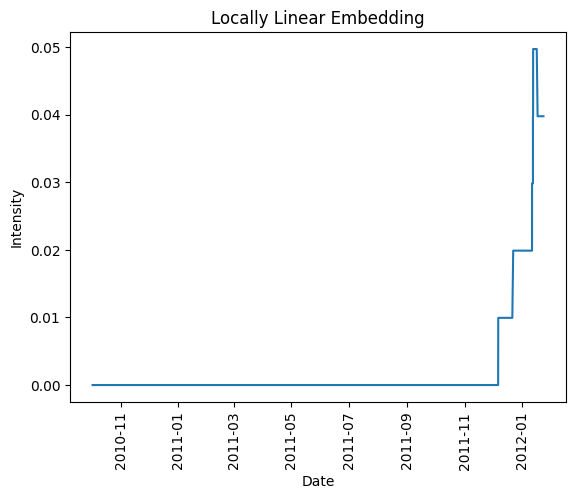

In [40]:
from pm4py.algo.transformation.log_to_features.util import locally_linear_embedding
from pm4py.visualization.graphs import visualizer

x, y = locally_linear_embedding.apply(df)
gviz = visualizer.apply(x, y, variant=visualizer.Variants.DATES, parameters={"title": "Locally Linear Embedding", "y_axis": "Intensity"})
visualizer.view(gviz)

#### Clustering

In [41]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=4)
# a number from "0" (first cluster) to "3" (last cluster) will be associated to every case of the log
clustering.fit_predict(ft)

array([2, 2, 3, ..., 3, 3, 3])

#### Decision Point Mining

Let $d$ be a decision point in a process model $M$ (in a Petri net, typically a place with multiple outgoing arcs).

Are there any data attributes in the event data that indicate which "direction" the case flow will go?

In [42]:
from pm4py.algo.decision_mining import algorithm as dem
pn, im, fm = pm4py.read_pnml('data/petri_net.pnml')
ft = dem.apply(df, pn, im, fm, decision_point='exi_idb451aba5-9e46-4292-93eb-f9d651c0139b')
ft[0]

replaying log with TBR, completed variants ::   0%|          | 0/116 [00:00<?, ?it/s]

,org:group_EMPTY,org:group_Group 4
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [43]:
ft[1]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
20    1
21    0
22    0
23    1
24    1
25    0
Name: Target, dtype: int64

[Text(0.5, 0.75, 'org:group_Group 4 <= 0.5\ngini = 0.355\nsamples = 26\nvalue = [20, 6]\nclass = T13 Adjust document X request unlicensed'),
 Text(0.25, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = T11 Create document X request unlicensed'),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 21\nvalue = [18, 3]\nclass = T13 Adjust document X request unlicensed')]

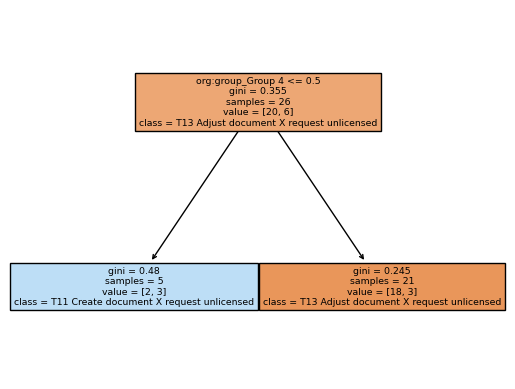

In [44]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(ft[0], ft[1])
tree.plot_tree(clf, 
                   feature_names=list(ft[0].columns.values),  
                   class_names=['T13 Adjust document X request unlicensed', 'T11 Create document X request unlicensed'],
                   filled=True)

#### Case Duration Prediction

In [45]:
data, feature_names = log_to_features.apply(log, parameters={"str_tr_attr": ["channel", "group", "responsible", "department"], "str_ev_attr": [], "num_tr_attr": [], "num_ev_attr": [], "str_evsucc_attr": []})
throughput_time = [y[-1]["time:timestamp"].timestamp() - y[0]["time:timestamp"].timestamp() for y in log]
throughput_time[0:5]

[3811896.2769999504,
 617.9240000247955,
 239.11499977111816,
 84.51800012588501,
 720.2450001239777]

In [46]:
import random
training_cases = set(random.sample([i for i in range(len(log))], 500))
data_training = [data[i] for i in range(len(log)) if i in training_cases]
throughput_time_training = [throughput_time[i] for i in range(len(log)) if i in training_cases]

In [47]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(data_training, throughput_time_training)

KNeighborsRegressor(n_neighbors=3)

In [48]:
data_validation = [data[i] for i in range(len(log)) if i not in training_cases]
throughput_time_validation = [throughput_time[i] for i in range(len(log)) if i not in training_cases]

In [49]:
predicted_throughput_time = regressor.predict(data_validation)

In [50]:
for i in range(5):
    print("case actual throughput=", throughput_time_validation[i], " predicted throughput = ", predicted_throughput_time[i])

case actual throughput= 3811896.2769999504  predicted throughput =  198447.95399999619
case actual throughput= 617.9240000247955  predicted throughput =  31.95733332633972
case actual throughput= 239.11499977111816  predicted throughput =  317.09166677792865
case actual throughput= 84.51800012588501  predicted throughput =  317.09166677792865
case actual throughput= 101.96599984169006  predicted throughput =  317.09166677792865


## Reflections: Process Mining and ML - The Bigger Picture

![](img/pm_generic.png)